In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay

In [2]:
df=pd.read_csv('data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: xlabel='target'>

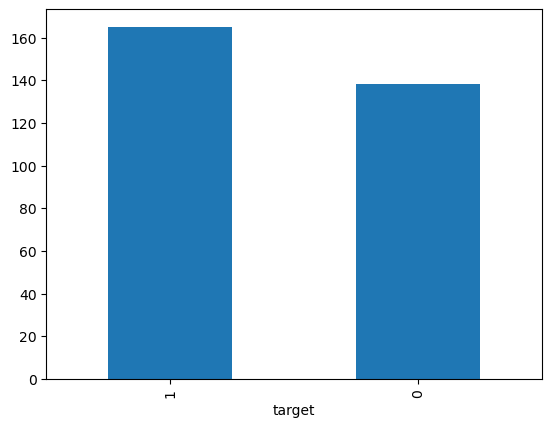

In [3]:
df['target'].value_counts().plot(kind='bar')

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [6]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

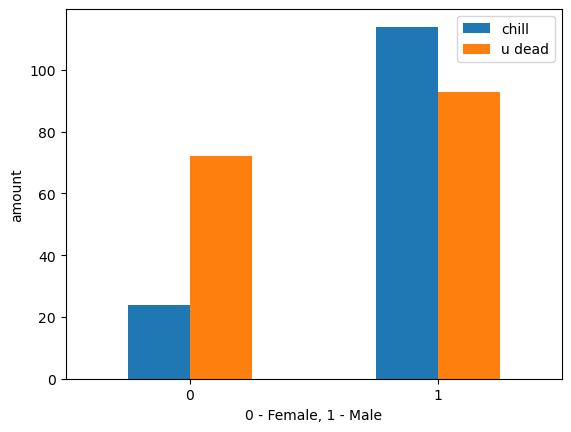

In [7]:
pd.crosstab(df.sex,df.target).plot(kind='bar')
plt.xlabel('0 - Female, 1 - Male')
plt.ylabel('amount')
plt.legend(['chill','u dead'])
plt.xticks(rotation=0)

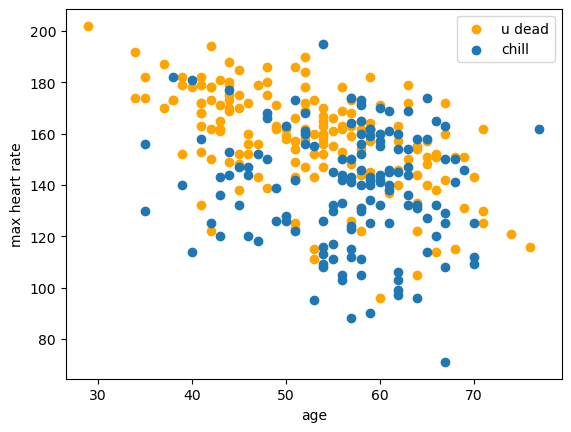

In [8]:
plt.figure()
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='orange')

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0])

plt.xlabel('age')
plt.ylabel('max heart rate')
plt.legend(['u dead','chill'])

In [9]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

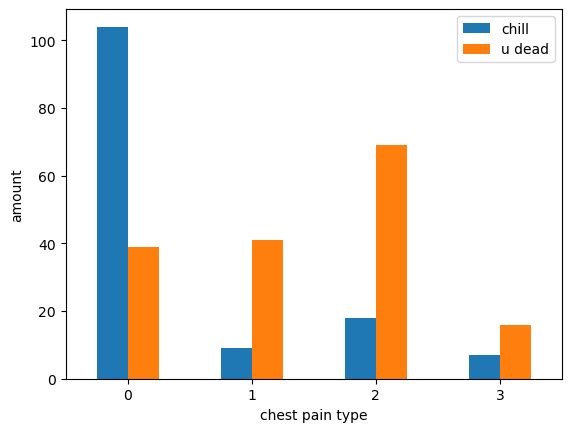

In [10]:
pd.crosstab(df.cp,df.target).plot(kind='bar')
plt.xlabel('chest pain type')
plt.ylabel('amount')
plt.legend(['chill','u dead'])
plt.xticks(rotation=0)

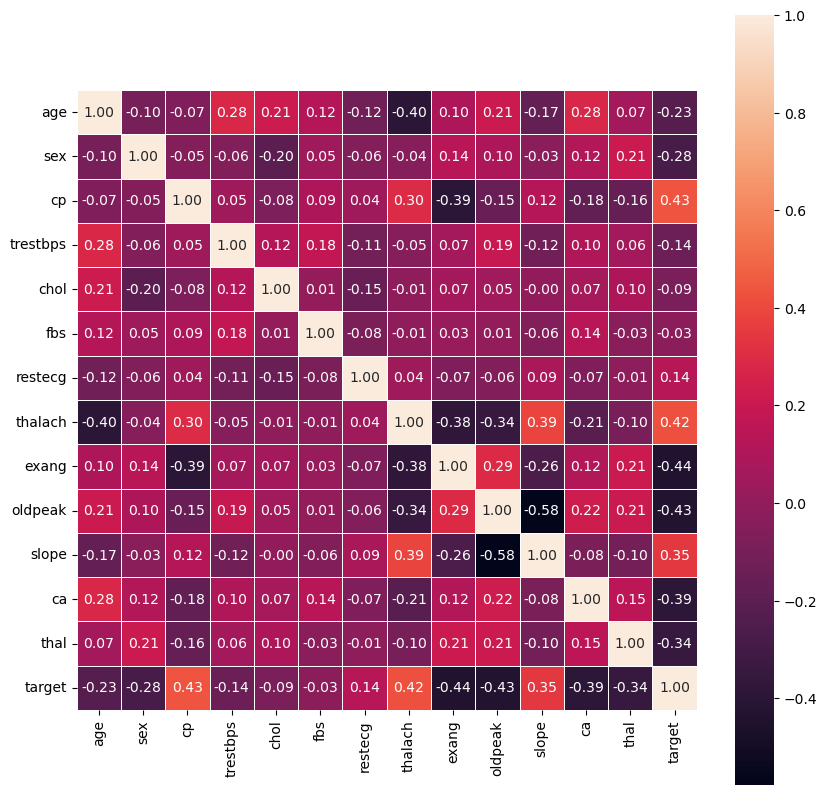

In [11]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt='.2f', square=True, ax=ax)

In [12]:
X=df.drop('target',axis=1)
y=df['target']

np.random.seed(42)
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [13]:
models = {"RandomForestClassifier": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "LogisticRegression": LogisticRegression()}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name]=model.score(X_test, y_test)
    return model_scores

In [14]:
model_scores=fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\karol\udemy\classification_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442}

<Axes: >

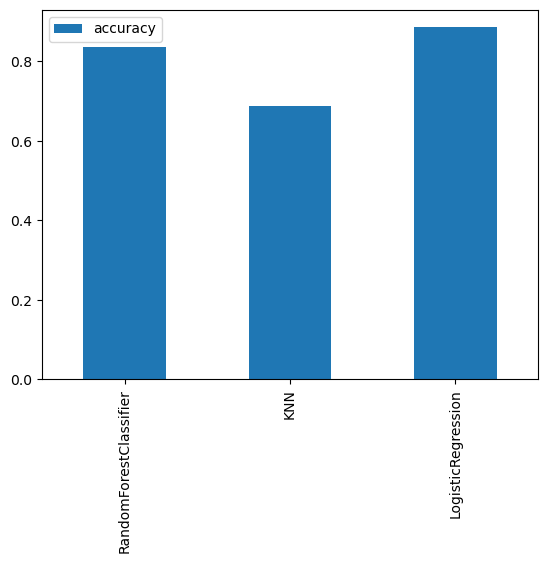

In [15]:
model_compare=pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

In [16]:
#KNN
train_scores=[]
test_scores=[]

neighbors=range(1,21)

knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [17]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [18]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

max KNN accuracy on test data 75.41%


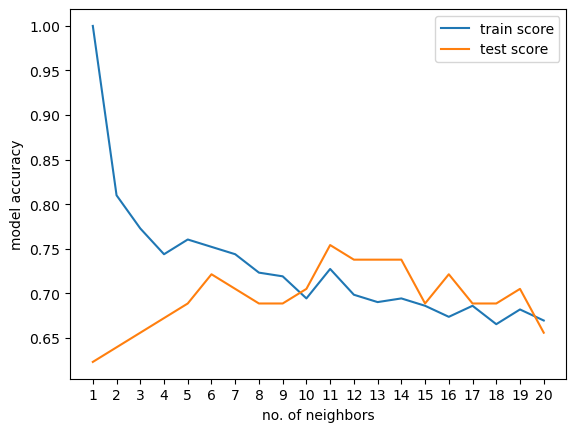

In [19]:
plt.plot(neighbors,train_scores,label='train score')
plt.plot(neighbors,test_scores,label='test score')
plt.xlabel('no. of neighbors')
plt.ylabel('model accuracy')
plt.legend()
plt.xticks(np.arange(1,21,1))

print(f'max KNN accuracy on test data {max(test_scores)*100:.2f}%')

In [20]:
rf_grid={'n_estimators': np.arange(10,1000,50),
        'max_depth':[None,3,5,1000],
        'min_samples_split':np.arange(2,20,2),
        'min_samples_leaf':np.arange(1,20,2)}

log_reg_grid={'C':np.logspace(-4,4,20),
             'solver':['liblinear']}

In [21]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             n_iter=20)

rs_rf.fit(X_train,y_train)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ...60, 910, 960])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [22]:
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [23]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [24]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             n_iter=20)

rs_log_reg.fit(X_train,y_train)

,estimator,LogisticRegression()
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [26]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [27]:
model_scores

{'RandomForestClassifier': 0.8360655737704918,
 'KNN': 0.6885245901639344,
 'LogisticRegression': 0.8852459016393442}

LogisticRegression best with 88.5%

In [28]:
log_reg_grid={'C':np.logspace(-4,4,50),
             'solver':['liblinear']}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid)

gs_log_reg.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [29]:
gs_log_reg.best_params_

{'C': np.float64(0.18420699693267145), 'solver': 'liblinear'}

In [30]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [31]:
y_pred=gs_log_reg.predict(X_test)

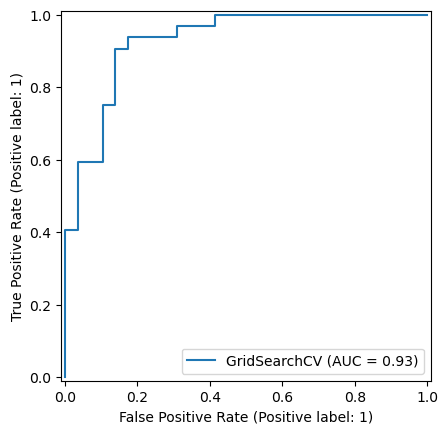

In [32]:
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)
plt.savefig("roc_curve.png")

In [33]:
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


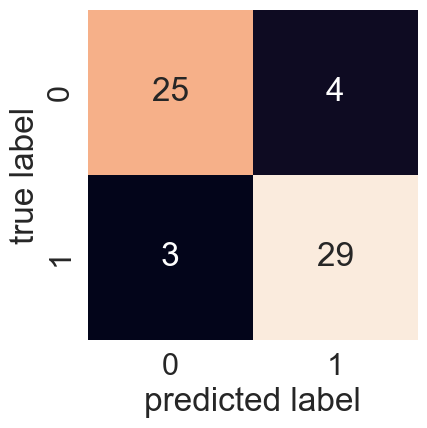

In [34]:
sns.set(font_scale=2)
 
def plot_conf_mat(y_test, y_pred):
    fig,ax=plt.subplots()
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),
                   annot=True,
                   cbar=False,
                   square=True,
                   ax=ax)
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    
plot_conf_mat(y_test, y_pred)

plt.tight_layout()
plt.savefig("confusion_matrix.png")

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [36]:
clf=LogisticRegression(C=0.18420699693267145,solver='liblinear')

In [37]:
cv_acc=cross_val_score(clf,X,y,scoring='accuracy').mean()
cv_acc

np.float64(0.8446994535519124)

In [38]:
cv_prec=cross_val_score(clf,X,y,scoring='precision').mean()
cv_prec

np.float64(0.8207936507936507)

In [39]:
cv_rec=cross_val_score(clf,X,y,scoring='recall').mean()
cv_rec

np.float64(0.9212121212121213)

In [40]:
cv_f1=cross_val_score(clf,X,y,scoring='f1').mean()
cv_f1

np.float64(0.8673007976269721)

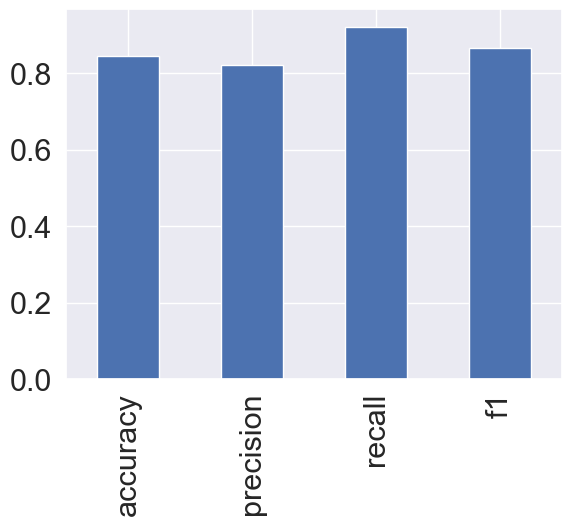

In [41]:
cv_metrics=pd.DataFrame({'accuracy':cv_acc,
                        'precision':cv_prec,
                        'recall':cv_rec,
                        'f1':cv_f1},
                       index=[0])
cv_metrics.T.plot.bar(legend=False)

plt.savefig('cv_metrics.png', bbox_inches='tight')

In [42]:
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.18420699693267145
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [43]:
clf.coef_

array([[ 0.00274534, -0.82466189,  0.64946587, -0.01155522, -0.00162953,
         0.04067028,  0.29769479,  0.02448922, -0.58200187, -0.56321728,
         0.43464708, -0.62480489, -0.66201556]])

In [44]:
feature_dict=dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0027453388946929187),
 'sex': np.float64(-0.824661890588809),
 'cp': np.float64(0.6494658744531004),
 'trestbps': np.float64(-0.011555217578049105),
 'chol': np.float64(-0.0016295281892291802),
 'fbs': np.float64(0.040670283694531004),
 'restecg': np.float64(0.29769479242008245),
 'thalach': np.float64(0.02448921764656036),
 'exang': np.float64(-0.5820018686153617),
 'oldpeak': np.float64(-0.5632172849700932),
 'slope': np.float64(0.43464707836362726),
 'ca': np.float64(-0.6248048892031132),
 'thal': np.float64(-0.6620155629137882)}

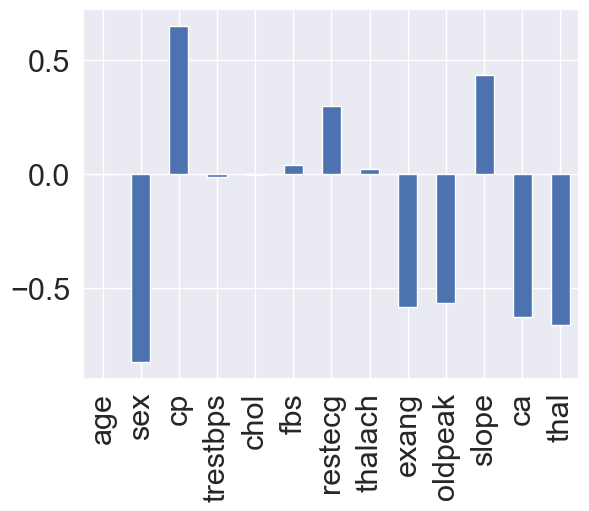

In [45]:
feature_df=pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(legend=False)

plt.savefig("feature_importance.png",bbox_inches='tight')

In [46]:
from joblib import dump, load

dump(clf, 'hd_model_1.joblib')

['hd_model_1.joblib']

In [47]:
hd_model_1=load('hd_model_1.joblib')
hd_model_1.score(X_test, y_test)

0.8852459016393442